# Run model module locally

In [11]:
import os

# Import os environment variables for file hyperparameters.
os.environ["TRAIN_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/data/mnist/train*.tfrecord"
os.environ["EVAL_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/data/mnist/test*.tfrecord"
os.environ["OUTPUT_DIR"] = "gs://machine-learning-1234-bucket/gan/vanilla_gan/trained_model"

# Import os environment variables for train hyperparameters.
os.environ["TRAIN_BATCH_SIZE"] = str(16)
os.environ["TRAIN_STEPS"] = str(37500)
os.environ["SAVE_SUMMARY_STEPS"] = str(100)
os.environ["SAVE_CHECKPOINTS_STEPS"] = str(1000)
os.environ["KEEP_CHECKPOINT_MAX"] = str(10)
os.environ["INPUT_FN_AUTOTUNE"] = "False"

# Import os environment variables for eval hyperparameters.
os.environ["EVAL_BATCH_SIZE"] = str(16)
os.environ["EVAL_STEPS"] = str(10)
os.environ["START_DELAY_SECS"] = str(6000)
os.environ["THROTTLE_SECS"] = str(6000)

# Import os environment variables for image hyperparameters.
os.environ["HEIGHT"] = str(28)
os.environ["WIDTH"] = str(28)
os.environ["DEPTH"] = str(1)

# Import os environment variables for generator hyperparameters.
os.environ["LATENT_SIZE"] = str(512)
os.environ["GENERATOR_HIDDEN_UNITS"] = "256,512,1024"
os.environ["GENERATOR_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["GENERATOR_FINAL_ACTIVATION"] = "tanh"
os.environ["GENERATOR_L1_REGULARIZATION_SCALE"] = str(0.)
os.environ["GENERATOR_L2_REGULARIZATION_SCALE"] = str(0.)
os.environ["GENERATOR_OPTIMIZER"] = "Adam"
os.environ["GENERATOR_LEARNING_RATE"] = str(0.0002)
os.environ["GENERATOR_ADAM_BETA1"] = str(0.5)
os.environ["GENERATOR_ADAM_BETA2"] = str(0.999)
os.environ["GENERATOR_ADAM_EPSILON"] = str(1e-8)
os.environ["GENERATOR_CLIP_GRADIENTS"] = "None"
os.environ["GENERATOR_TRAIN_STEPS"] = str(1)

# Import os environment variables for discriminator hyperparameters.
os.environ["DISCRIMINATOR_HIDDEN_UNITS"] = "1024,512,256"
os.environ["DISCRIMINATOR_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["DISCRIMINATOR_L1_REGULARIZATION_SCALE"] = str(0.)
os.environ["DISCRIMINATOR_L2_REGULARIZATION_SCALE"] = str(0.)
os.environ["DISCRIMINATOR_OPTIMIZER"] = "Adam"
os.environ["DISCRIMINATOR_LEARNING_RATE"] = str(0.0002)
os.environ["DISCRIMINATOR_ADAM_BETA1"] = str(0.5)
os.environ["DISCRIMINATOR_ADAM_BETA2"] = str(0.999)
os.environ["DISCRIMINATOR_ADAM_EPSILON"] = str(1e-8)
os.environ["DISCRIMINATOR_CLIP_GRADIENTS"] = "None"
os.environ["DISCRIMINATOR_TRAIN_STEPS"] = str(1)
os.environ["LABEL_SMOOTHING"] = str(0.9)


## Train Vanilla GAN model

In [12]:
%%bash
gsutil -m rm -rf ${OUTPUT_DIR}
export PYTHONPATH=$PYTHONPATH:$PWD/vanilla_gan_module
python3 -m trainer.task \
    --train_file_pattern=${TRAIN_FILE_PATTERN} \
    --eval_file_pattern=${EVAL_FILE_PATTERN} \
    --output_dir=${OUTPUT_DIR} \
    --job-dir=./tmp \
    \
    --train_batch_size=${TRAIN_BATCH_SIZE} \
    --train_steps=${TRAIN_STEPS} \
    --save_summary_steps=${SAVE_SUMMARY_STEPS} \
    --save_checkpoints_steps=${SAVE_CHECKPOINTS_STEPS} \
    --keep_checkpoint_max=${KEEP_CHECKPOINT_MAX} \
    --input_fn_autotune=${INPUT_FN_AUTOTUNE} \
    \
    --eval_batch_size=${EVAL_BATCH_SIZE} \
    --eval_steps=${EVAL_STEPS} \
    --start_delay_secs=${START_DELAY_SECS} \
    --throttle_secs=${THROTTLE_SECS} \
    \
    --height=${HEIGHT} \
    --width=${WIDTH} \
    --depth=${DEPTH} \
    \
    --latent_size=${LATENT_SIZE} \
    --generator_hidden_units=${GENERATOR_HIDDEN_UNITS} \
    --generator_leaky_relu_alpha=${GENERATOR_LEAKY_RELU_ALPHA} \
    --generator_final_activation=${GENERATOR_FINAL_ACTIVATION} \
    --generator_l1_regularization_scale=${GENERATOR_L1_REGULARIZATION_SCALE} \
    --generator_l2_regularization_scale=${GENERATOR_L2_REGULARIZATION_SCALE} \
    --generator_optimizer=${GENERATOR_OPTIMIZER} \
    --generator_learning_rate=${GENERATOR_LEARNING_RATE} \
    --generator_adam_beta1=${GENERATOR_ADAM_BETA1} \
    --generator_adam_beta2=${GENERATOR_ADAM_BETA2} \
    --generator_adam_epsilon=${GENERATOR_ADAM_EPSILON} \
    --generator_clip_gradients=${GENERATOR_CLIP_GRADIENTS} \
    --generator_train_steps=${GENERATOR_TRAIN_STEPS} \
    \
    --discriminator_hidden_units=${DISCRIMINATOR_HIDDEN_UNITS} \
    --discriminator_leaky_relu_alpha=${DISCRIMINATOR_LEAKY_RELU_ALPHA} \
    --discriminator_l1_regularization_scale=${DISCRIMINATOR_L1_REGULARIZATION_SCALE} \
    --discriminator_l2_regularization_scale=${DISCRIMINATOR_L2_REGULARIZATION_SCALE} \
    --discriminator_optimizer=${DISCRIMINATOR_OPTIMIZER} \
    --discriminator_learning_rate=${DISCRIMINATOR_LEARNING_RATE} \
    --discriminator_adam_beta1=${DISCRIMINATOR_ADAM_BETA1} \
    --discriminator_adam_beta2=${DISCRIMINATOR_ADAM_BETA2} \
    --discriminator_adam_epsilon=${DISCRIMINATOR_ADAM_EPSILON} \
    --discriminator_clip_gradients=${DISCRIMINATOR_CLIP_GRADIENTS} \
    --discriminator_train_steps=${DISCRIMINATOR_TRAIN_STEPS} \
    --label_smoothing=${LABEL_SMOOTHING}


decode_example: features = {'image_raw': FixedLenFeature(shape=[], dtype=tf.string, default_value=None), 'label': FixedLenFeature(shape=[], dtype=tf.int64, default_value=None)}
decode_example: image = Tensor("DecodeRaw:0", shape=(?,), dtype=uint8)
decode_example: image = Tensor("Reshape:0", shape=(28, 28, 1), dtype=uint8)
preprocess_image: image = Tensor("sub:0", shape=(28, 28, 1), dtype=float32)
decode_example: image = Tensor("sub:0", shape=(28, 28, 1), dtype=float32)
decode_example: label = Tensor("Cast_1:0", shape=(), dtype=int32)

vanilla_gan_model: features = {'image': <tf.Tensor 'IteratorGetNext:0' shape=(?, 28, 28, 1) dtype=float32>}
vanilla_gan_model: labels = Tensor("IteratorGetNext:1", shape=(?,), dtype=int32, device=/device:CPU:0)
vanilla_gan_model: mode = train
vanilla_gan_model: params = {'train_file_pattern': 'gs://machine-learning-1234-bucket/gan/data/mnist/train*.tfrecord', 'eval_file_pattern': 'gs://machine-learning-1234-bucket/gan/data/mnist/test*.tfrecord', 'output_

Removing gs://machine-learning-1234-bucket/gan/vanilla_gan/trained_model/#1592450289772205...
Removing gs://machine-learning-1234-bucket/gan/vanilla_gan/trained_model/checkpoint#1592451115805874...
Removing gs://machine-learning-1234-bucket/gan/vanilla_gan/trained_model/eval/#1592450326864932...
Removing gs://machine-learning-1234-bucket/gan/vanilla_gan/trained_model/events.out.tfevents.1592450289.tf-1-15#1592451128753853...
Removing gs://machine-learning-1234-bucket/gan/vanilla_gan/trained_model/eval/events.out.tfevents.1592450326.tf-1-15#1592451121135362...
Removing gs://machine-learning-1234-bucket/gan/vanilla_gan/trained_model/export/#1592450329179569...
Removing gs://machine-learning-1234-bucket/gan/vanilla_gan/trained_model/export/exporter/#1592450329517672...
Removing gs://machine-learning-1234-bucket/gan/vanilla_gan/trained_model/export/exporter/1592450328/#1592450335428684...
Removing gs://machine-learning-1234-bucket/gan/vanilla_gan/trained_model/export/exporter/1592450328/sa

## Prediction

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [13]:
!gsutil ls gs://machine-learning-1234-bucket/gan/vanilla_gan/trained_model/export/exporter

gs://machine-learning-1234-bucket/gan/vanilla_gan/trained_model/export/exporter/
gs://machine-learning-1234-bucket/gan/vanilla_gan/trained_model/export/exporter/1592451361/
gs://machine-learning-1234-bucket/gan/vanilla_gan/trained_model/export/exporter/1592452165/


In [14]:
predict_fn = tf.contrib.predictor.from_saved_model(
    "gs://machine-learning-1234-bucket/gan/vanilla_gan/trained_model/export/exporter/1592452165"
)
predictions = predict_fn(
    {
        "Z": np.random.normal(size=(10, 512))
    }
)

INFO:tensorflow:Restoring parameters from gs://machine-learning-1234-bucket/gan/vanilla_gan/trained_model/export/exporter/1592452165/variables/variables


In [15]:
print(list(predictions.keys()))

['generated_images']


Convert image back to the original scale.

In [16]:
generated_images = np.clip(
    a=((predictions["generated_images"] + 1.0) * (255. / 2)).astype(np.int32),
    a_min=0,
    a_max=255
)

In [17]:
print(generated_images.shape)

(10, 28, 28, 1)


In [9]:
def plot_images(images):
    """Plots images.

    Args:
        images: np.array, array of images of
            [num_images, height, width, depth].
        
    """
    num_images = len(images)

    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        image = images[i]
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(
            image.reshape(image.shape[:-1]),
            cmap="gray_r"
        )
    plt.show()

### Generator Final Activation: Linear

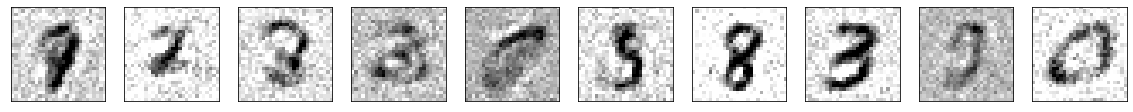

In [10]:
plot_images(generated_images)

### Generator Final Activation: Tanh

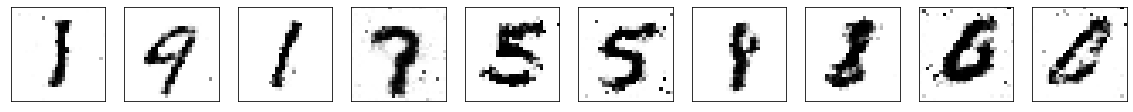

In [18]:
plot_images(generated_images)